# Analyse scores

In [1]:
import numpy as np

dictionary = np.load('watermark_scores_2.npy',allow_pickle='TRUE').item()

In [2]:
len(dictionary)

140

In [3]:
dictionary

{'12.jpg': (array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
  array([0.8803954 , 0.79786944, 0.71241105, 0.7102759 , 0.7025394 ,
         0.6808714 , 0.6347862 , 0.632234  , 0.602247  , 0.5923569 ,
         0.589333  , 0.5856359 , 0.5801466 , 0.5728854 , 0.56343025,
         0.55468744, 0.5108639 , 0.46713257], dtype=float32)),
 '13.jpg': (array([2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
  array([0.73497415, 0.7129028 , 0.6984238 , 0.67322457, 0.64245886,
         0.6235041 , 0.5975355 , 0.5113315 , 0.5024765 ], dtype=float32)),
 '15.jpg': (array([2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
  array([0.7396996 , 0.73497427, 0.71814924, 0.7129326 , 0.6424588 ,
         0.6235041 , 0.61191386, 0.51133144], dtype=float32)),
 '16.jpg': (array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
  array([0.725462  , 0.72436136, 0.71155393, 0.67263865, 0.670915  ,
         0.62352353, 0.6202269 , 0.5688392 , 0.5252475 , 0.51259613],
        dtype=float32)),
 '17.jpg': (array([

In [5]:
from sklearn.metrics import precision_recall_curve

y_true = []
probas_pred = []

for key in dictionary.keys():
    if 'watermarked' in key:
        y_true.append(1)
    else:
        y_true.append(0)
    if list(dictionary[key]):
        probas_pred.append(dictionary[key][1][0])
    else:
        probas_pred.append(0)

precision, recall, thresholds = precision_recall_curve(y_true, probas_pred)

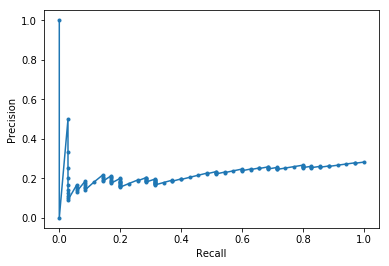

In [10]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [11]:
both = [precision[i] + recall[i] for i in range(len(recall))]

In [13]:
both.index(max(both))

0

In [14]:
thresholds[0]

0.5789846

# Binning

In [16]:
import numpy as np

x = np.arange(0.5, 1, 0.01)
watermark_binned_scores = [0 for _ in range(len(x))]
clean_binned_scores = [0 for _ in range(len(x))]

for key in dictionary.keys():
    if list(dictionary[key]):
        idx = int(round(dictionary[key][1][0] * 100)) - 50
        if 'watermarked' in key:
            watermark_binned_scores[idx] += 1
        else:
            clean_binned_scores[idx] += 1

In [17]:
sum(clean_binned_scores), sum(watermark_binned_scores)

(105, 35)

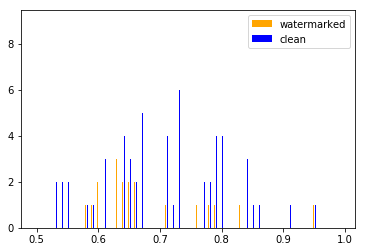

In [18]:
import matplotlib.pyplot as plt

plt.bar(x-0.001, watermark_binned_scores, width=0.001, color='orange', label='watermarked')
plt.bar(x+0.002, clean_binned_scores, width=0.001, color='blue', label='clean')
plt.legend()
plt.show()

In [23]:
thres = 0.55

TP = 0
FN = 0
FP = 0
TN = 0

for key in dictionary.keys():
    if 'clean' in key:
        if any(dictionary[key][1] > thres):
            FP += 1
        else:
            TN += 1
    else:
        if any(dictionary[key][1] > thres):
            TP += 1
        else:
            FN += 1
            
print("TP: ", TP)
print("FN: ", FN)
print("TN: ", TN)
print("FP: ", FP)
print("Weighted Accuracy: ", (TP/2*5 + TN) / ((TN + FP) * 2))
print("TP %: ", TP / (TP+FN))
print("TN %: ", TN / (TN+FP))

TP:  40
FN:  0
TN:  5
FP:  95
Weighted Accuracy:  0.525
TP %:  1.0
TN %:  0.05


# Filter 50% clean for training

In [8]:
import os

prev = '../data_cache'
new  = '../data'

splits = os.listdir(prev)

In [17]:
import shutil

for split in splits:
    prev_folder = prev + '/' + split
    prev_input  = prev_folder + '/' + 'input'
    prev_water  = prev_folder + '/' + 'mask_watermark'
    prev_word   = prev_folder + '/' + 'mask_word'
    
    new_folder = new + '/' + split
    new_input  = new_folder + '/' + 'input'
    new_water  = new_folder + '/' + 'mask_watermark'
    new_word   = new_folder + '/' + 'mask_word'
    
    
    
    positives     = os.listdir(prev_water)
    num_positives = len(positives)
    num_negatives = 0
    
    for filename in sorted(os.listdir(prev_input), reverse=True):
        if filename in positives:
            # copy input, mask_water, mask_word
            shutil.copy2(prev_input + '/' + filename, new_input)
            shutil.copy2(prev_water + '/' + filename, new_water)
            shutil.copy2(prev_word + '/' + filename, new_word)

        else:
            if num_negatives >= num_positives:
                continue
            # copy input
            shutil.copy2(prev_input + '/' + filename, new_input)
            num_negatives += 1            

In [18]:
num_negatives

1414